# Homework 1 - Jingwen Li

## FINM 35700 - Spring 2023

### UChicago Financial Mathematics

* Alex Popovici
* alex.popovici@uchicago.edu

This homework relies on:

- the US government bonds symbology file `govt_symbology`, 
- the "on-the-run" treasuries data file `govt_on_the_run`,
- the corporate  bonds symbology file `corp_symbology` and
- the market data file `market_prices_eod`.


You can find more details on US treasury instruments in the FINM 37400 Fixed Income course.



In [53]:
import numpy as np
import pandas as pd
from QuantLib import Date, ActualActual
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem 1: Explore symbology for US treasuries and corporate bonds

## a. Load and explore US government bonds symbology data

Load the `govt_symbology` Excel file into a dataframe. For each government bond issue, calculate its initial term/time-to-maturity in years (based on issue date and maturity date), as well as the current time-to-maturity. Assume a year has 365.25 days, or use QuantLib yearFraction() function.

In [54]:
govt_symbology = pd.read_excel('govt_symbology.xlsx')
govt_symbology.head()

,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,dcc,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,country,currency
0,B,Govt,BBG01FSQGRT9,US912796CQ02,TSRYS5551439,B 09/14/23,TREASURY BILL,US GOVERNMENT,0.0,ZERO,ACT/360,NaN,1,2023-03-16,NaT,NaT,2023-09-14,US,USD
1,B,Govt,BBG01FY3YC89,US912796CR84,TSRYS5554749,B 09/21/23,TREASURY BILL,US GOVERNMENT,0.0,ZERO,ACT/360,NaN,1,2023-03-23,NaT,NaT,2023-09-21,US,USD
2,B,Govt,BBG01G14BS72,US912796CS67,TSRYS5557561,B 09/28/23,TREASURY BILL,US GOVERNMENT,0.0,ZERO,ACT/360,NaN,1,2023-03-30,NaT,NaT,2023-09-28,US,USD
3,B,Govt,BBG01BYWNTS7,US912796CU14,TSRYS5513508,B 04/18/23,TREASURY BILL,US GOVERNMENT,0.0,ZERO,ACT/360,NaN,1,2022-12-20,NaT,NaT,2023-04-18,US,USD
4,B,Govt,BBG01C3GB4X6,US912796CV96,TSRYS5516304,B 04/25/23,TREASURY BILL,US GOVERNMENT,0.0,ZERO,ACT/360,NaN,1,2022-12-27,NaT,NaT,2023-04-25,US,USD


- calculate its initial term/time-to-maturity in years (based on issue date and maturity date), as well as the current time-to-maturity

In [55]:
today = datetime.now()
ql_today = Date(today.day, today.month, today.year)
day_count = ActualActual(ActualActual.Bond)

govt_symbology['Initial Term'] = govt_symbology.apply(lambda row: day_count.yearFraction(
    Date(row['start_date'].day, row['start_date'].month, row['start_date'].year),
    Date(row['maturity'].day, row['maturity'].month, row['maturity'].year)
), axis=1)

govt_symbology['Current Time to Maturity'] = govt_symbology.apply(lambda row: day_count.yearFraction(
    ql_today,
    Date(row['maturity'].day, row['maturity'].month, row['maturity'].year)
), axis=1)

metrics = govt_symbology[['ticker', 'class', 'figi', 'isin','trace', 'security', 'name','type', 'Initial Term', 'Current Time to Maturity']]
metrics.head()

,ticker,class,figi,isin,trace,security,name,type,Initial Term,Current Time to Maturity
0,B,Govt,BBG01FSQGRT9,US912796CQ02,TSRYS5551439,B 09/14/23,TREASURY BILL,US GOVERNMENT,0.500000,0.416667
1,B,Govt,BBG01FY3YC89,US912796CR84,TSRYS5554749,B 09/21/23,TREASURY BILL,US GOVERNMENT,0.500000,0.416667
2,B,Govt,BBG01G14BS72,US912796CS67,TSRYS5557561,B 09/28/23,TREASURY BILL,US GOVERNMENT,0.500000,0.416667
3,B,Govt,BBG01BYWNTS7,US912796CU14,TSRYS5513508,B 04/18/23,TREASURY BILL,US GOVERNMENT,0.333333,-0.019126
4,B,Govt,BBG01C3GB4X6,US912796CV96,TSRYS5516304,B 04/25/23,TREASURY BILL,US GOVERNMENT,0.333333,0.000000


## b. Historical time series of US treasury coupons 

Plot the time series of coupons for US treasury notes/bonds issued in the last 10 years (indexed by issue date). 
What can you say about the overall level of the coupons in the last 2 years?


In [56]:
govt_symbology = govt_symbology.set_index('start_date')
govt_symbology.sort_index(inplace=True)
govt_symbology.head()

,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,dcc,cpn_freq,days_settle,cpn_first,acc_first,maturity,country,currency,Initial Term,Current Time to Maturity
start_date,,,,,,,,,,,,,,,,,,,,
1993-08-16,T,Govt,BBG000DLJF04,US912810EQ77,TSRYS4493810,T 6 1/4 08/15/23,US TREASURY N/B,US GOVERNMENT,6.250,FIXED,ACT/ACT,2.0,1,1994-02-15,1993-08-15,2023-08-15,US,USD,30.00,0.333333
1994-08-15,T,Govt,BBG000DKZWK9,US912810ES34,TSRYS4493811,T 7 1/2 11/15/24,US TREASURY N/B,US GOVERNMENT,7.500,FIXED,ACT/ACT,2.0,1,1994-11-15,1994-05-15,2024-11-15,US,USD,30.25,1.583333
1995-02-15,T,Govt,BBG000DLBVY0,US912810ET17,TSRYS4493812,T 7 5/8 02/15/25,US TREASURY N/B,US GOVERNMENT,7.625,FIXED,ACT/ACT,2.0,1,1995-08-15,1995-02-15,2025-02-15,US,USD,30.00,1.833333
1995-08-15,T,Govt,BBG000DQQNJ8,US912810EV62,TSRYS4493813,T 6 7/8 08/15/25,US TREASURY N/B,US GOVERNMENT,6.875,FIXED,ACT/ACT,2.0,1,1996-02-15,1995-08-15,2025-08-15,US,USD,30.00,2.333333
1996-02-15,T,Govt,BBG000DPXMD0,US912810EW46,TSRYS4493814,T 6 02/15/26,US TREASURY N/B,US GOVERNMENT,6.000,FIXED,ACT/ACT,2.0,1,1996-08-15,1996-02-15,2026-02-15,US,USD,30.00,2.833333


Text(0.5, 1.0, 'Coupon Rate for US Treasury Notes/Bonds Issued In The Last 10 Years')

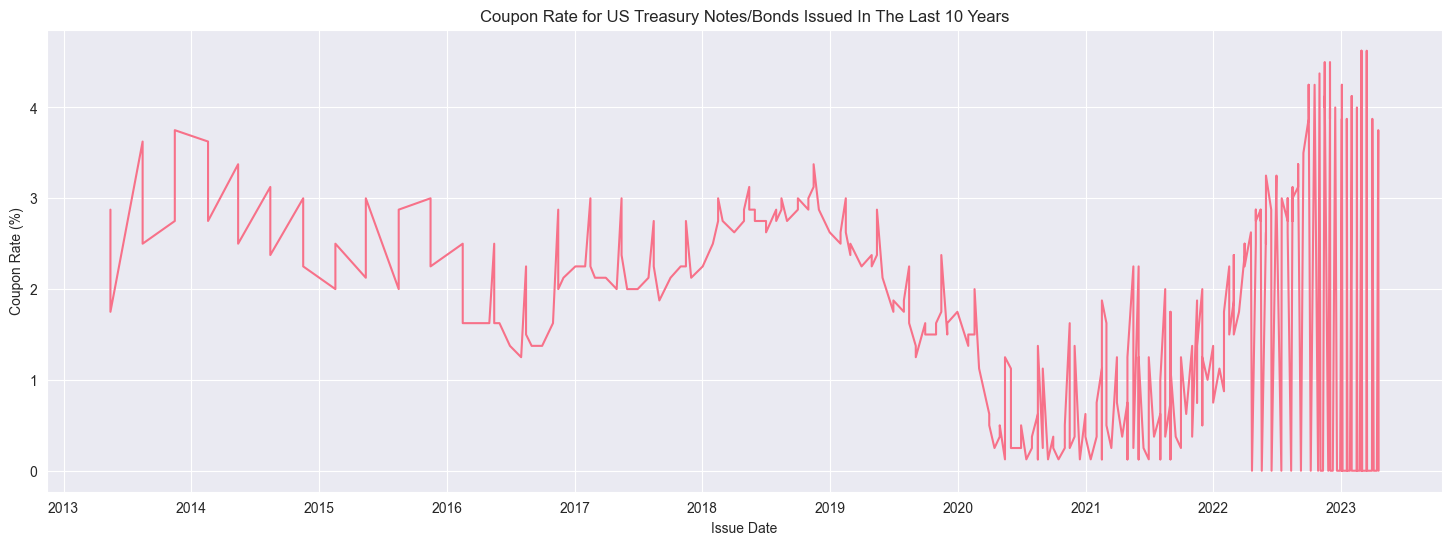

In [57]:
govt_symbology_10y = govt_symbology['2013-04-17':]
plt.figure(figsize=(18, 6))
plt.plot(govt_symbology_10y.index, govt_symbology_10y['coupon'])
plt.xlabel('Issue Date')
plt.ylabel('Coupon Rate (%)')
plt.title('Coupon Rate for US Treasury Notes/Bonds Issued In The Last 10 Years')

Text(0.5, 1.0, 'Coupon Rate for US Treasury Notes/Bonds Issued In The Last 2 Years')

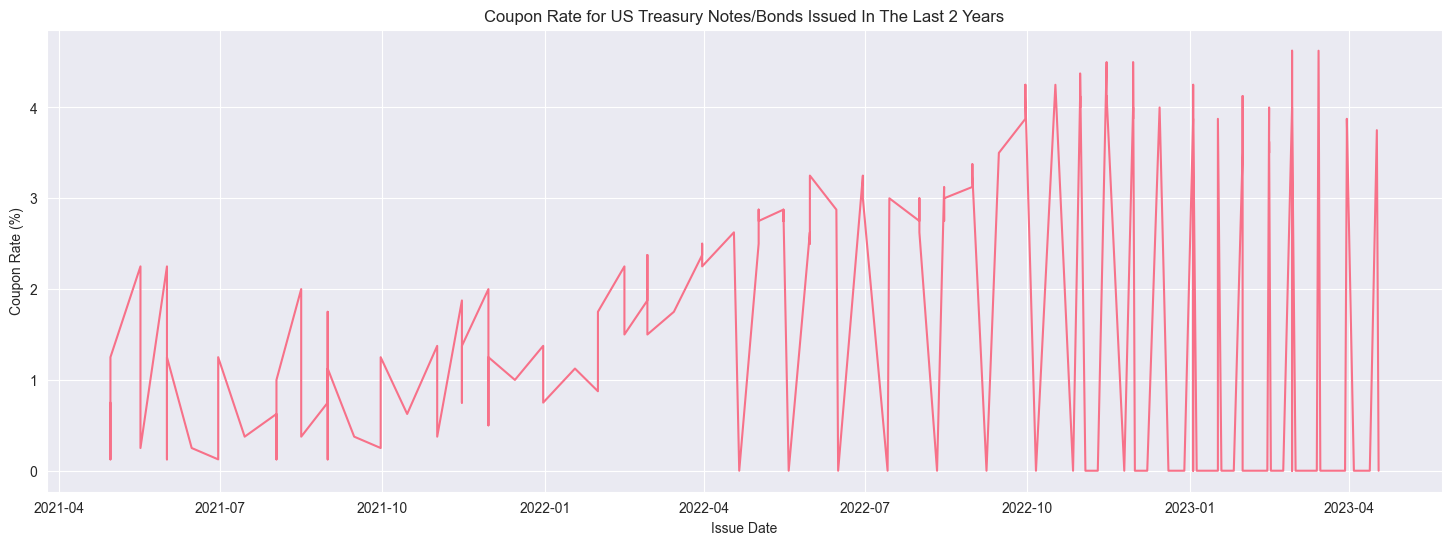

In [58]:
govt_symbology_2y = govt_symbology['2021-04-17':]
plt.figure(figsize=(18, 6))
plt.plot(govt_symbology_2y.index, govt_symbology_2y['coupon'])
plt.xlabel('Issue Date')
plt.ylabel('Coupon Rate (%)')
plt.title('Coupon Rate for US Treasury Notes/Bonds Issued In The Last 2 Years')

In [59]:
govt_symbology_10y['coupon'].describe()

count    344.000000
mean       1.752180
std        1.298896
min        0.000000
25%        0.375000
50%        1.750000
75%        2.750000
max        4.625000
Name: coupon, dtype: float64

In [60]:
govt_symbology_2y['coupon'].describe()

count    169.000000
mean       1.678254
std        1.569192
min        0.000000
25%        0.000000
50%        1.250000
75%        3.125000
max        4.625000
Name: coupon, dtype: float64

Comment: Overall, it looks like that the coupon rates for the last two years are more dispersed than those for the last 10 years, with a wider range of values and a higher standard deviation. However, the mean coupon rate is relatively similar between the two periods.

## c. Load the on-the-run US treasuries

Load the `govt_on_the_run` Excel file into a dataframe. Select the current on-the-run 2Y, 3Y, 5Y, 7Y, 10Y, 20Y and 30Y issues (off-the-run issues have the B & C suffix). Create a separate symbology dataframe for on-the-run treasuries only, to be used later on for the on-the-run government yield curve bootstrapping.

In [61]:
govt_on_the_run = pd.read_excel('govt_on_the_run.xlsx')
govt_on_the_run.head()

,ticker,date,isin,figi
0,GT10 Govt,2023-04-14,US91282CGM73,BBG01DVKBC66
1,GT10B Govt,2023-04-14,US91282CFV81,BBG01BC373F4
2,GT10C Govt,2023-04-14,US91282CFF32,BBG01920ZBH5
3,GT2 Govt,2023-04-14,US91282CGU99,BBG01G14BXX2
4,GT20 Govt,2023-04-14,US912810TQ13,BBG01F6N6GN1


In [62]:
tenors = ['2', '3', '5', '7', '10', '20', '30']
tickers = [f'GT{tenor} Govt' for tenor in tenors]
df_symbology = govt_on_the_run.query('ticker in @tickers')
df_symbology 

,ticker,date,isin,figi
0,GT10 Govt,2023-04-14,US91282CGM73,BBG01DVKBC66
3,GT2 Govt,2023-04-14,US91282CGU99,BBG01G14BXX2
4,GT20 Govt,2023-04-14,US912810TQ13,BBG01F6N6GN1
9,GT3 Govt,2023-04-14,US91282CGV72,BBG01G5ZMM43
10,GT30 Govt,2023-04-14,US912810TN81,BBG01DVKBH56
15,GT5 Govt,2023-04-14,US91282CGT27,BBG01G14BW91
18,GT7 Govt,2023-04-14,US91282CGS44,BBG01G14BV75


## d. Load and explore US corporate bonds symbology data

Load the `corp_symbology` Excel file into a dataframe. 

Create a new (filtered) dataframe for 
* bullet/non-callable (mty_typ="AT MATURITY"), 
* senior unsecured (rank = "Sr Unsecured"),
* fixed coupon (cpn_type="FIXED")

bonds only, with following columns:



| ticker | figi | security | name | coupon | start_date | maturity | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

where 
* `term` refers to the initial term/time-to-maturity in years
* `TTM` refers to the current time-to-maturity in years

Create a separate dataframe for VZ issuer only.

In [63]:
corp_symbology = pd.read_excel('corp_symbology.xlsx')
corp_symbology.head()

,ticker,class,figi,isin,trace,und_bench_isin,security,name,type,coupon,...,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,mty_typ,rank,country,currency
0,DIS,Corp,BBG00QNKJ092,US254687CZ75,DIS4921182,US91282CGU99,DIS 3.7 09/15/24,WALT DISNEY COMPANY/THE,GLOBAL,3.700,...,2,2,2019-11-22,2020-03-15,2019-09-15,2024-09-15,CALLABLE,Sr Unsecured,US,USD
1,DIS,Corp,BBG00QNKPCL5,US254687DD54,DIS4907444,US91282CGU99,DIS 3.7 10/15/25,WALT DISNEY COMPANY/THE,GLOBAL,3.700,...,2,2,2019-11-22,2020-04-15,2019-10-15,2025-10-15,CALLABLE,Sr Unsecured,US,USD
2,DIS,Corp,BBG00QNKGJP6,US254687DK97,DIS4907439,US91282CGR60,DIS 3 3/8 11/15/26,WALT DISNEY COMPANY/THE,GLOBAL,3.375,...,2,2,2019-11-22,2020-05-15,2019-11-15,2026-11-15,CALLABLE,Sr Unsecured,US,USD
3,DIS,Corp,BBG00QNKP8R8,US254687DV52,DIS4908605,US91282CGM73,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,GLOBAL,6.550,...,2,2,2019-11-22,2020-03-15,2019-09-15,2033-03-15,AT MATURITY,Sr Unsecured,US,USD
4,DIS,Corp,BBG00QNKR4J4,US254687DZ66,DIS4908062,US91282CGM73,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,GLOBAL,6.200,...,2,2,2019-11-22,2019-12-15,2019-06-15,2034-12-15,AT MATURITY,Sr Unsecured,US,USD


In [64]:
corp_symbology_filtered = corp_symbology[(corp_symbology['mty_typ'] == 'AT MATURITY') & 
                                         (corp_symbology['rank'] == 'Sr Unsecured') & 
                                         (corp_symbology['cpn_type'] == 'FIXED')]

corp_symbology_filtered = corp_symbology_filtered[['ticker', 'figi', 'security', 'name', 'coupon', 'start_date', 'maturity']]

corp_symbology_filtered['term'] = corp_symbology_filtered.apply(lambda row: day_count.yearFraction(
    Date(row['start_date'].day, row['start_date'].month, row['start_date'].year),
    Date(row['maturity'].day, row['maturity'].month, row['maturity'].year)
), axis=1)

corp_symbology_filtered['TTM'] = corp_symbology_filtered.apply(lambda row: day_count.yearFraction(
    ql_today,
    Date(row['maturity'].day, row['maturity'].month, row['maturity'].year)
), axis=1)

corp_symbology_filtered.head()

,ticker,figi,security,name,coupon,start_date,maturity,term,TTM
3,DIS,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.55,2019-11-22,2033-03-15,13.333333,9.916667
4,DIS,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.20,2019-11-22,2034-12-15,15.083333,11.666667
5,DIS,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.40,2019-11-22,2035-12-15,16.083333,12.666667
6,DIS,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.15,2019-11-22,2037-03-01,17.250000,13.833333
7,DIS,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.65,2019-11-22,2037-11-15,18.000000,14.583333


In [65]:
corp_symbology_VZ = corp_symbology_filtered[corp_symbology_filtered['ticker']=='VZ']
corp_symbology_VZ.head()

,ticker,figi,security,name,coupon,start_date,maturity,term,TTM
181,VZ,BBG00000BHR9,VZ 6 1/4 04/01/37,VERIZON COMMUNICATIONS,6.25,2007-04-03,2037-04-01,30.0,13.916667
182,VZ,BBG0000M1DD6,VZ 6.4 02/15/38,VERIZON COMMUNICATIONS,6.40,2008-02-12,2038-02-15,30.0,14.833333
183,VZ,BBG0027BCJ08,VZ 4 3/4 11/01/41,VERIZON COMMUNICATIONS,4.75,2011-11-03,2041-11-01,30.0,18.500000
185,VZ,BBG00580D503,VZ 6.4 09/15/33,VERIZON COMMUNICATIONS,6.40,2013-09-18,2033-09-15,20.0,10.416667
186,VZ,BBG00580DD79,VZ 6.55 09/15/43,VERIZON COMMUNICATIONS,6.55,2013-09-18,2043-09-15,30.0,20.416667


# Problem 2: Explore EOD market prices and yields

## a. Load and explore treasury market prices and yields

Load the `market_prices_eod` Excel file into a dataframe. It provides market data for US treasuries and corporate bonds of 2023-04-14.

Join the treasuries symbology dataframe with the market data, to add the following columns:


| date | bid | ask | mid | bid_yield | ask_yield | mid_yield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

Plot a graph/scatter plot of treasury mid yields by TTM.


In [66]:
market_prices_eod = pd.read_excel('market_prices_eod.xlsx')
market_prices_eod.head()

,date,class,ticker,isin,figi,bid,ask,mid_clean,mid_dirty,bid_yield,ask_yield
0,2023-04-14,Corp,DIS,US254687CZ75,BBG00QNKJ092,98.678,98.848,98.763,99.102,4.679,4.551
1,2023-04-14,Corp,DIS,US254687DD54,BBG00QNKPCL5,98.454,98.821,98.637,98.668,4.361,4.203
2,2023-04-14,Corp,DIS,US254687DK97,BBG00QNKGJP6,97.090,97.369,97.230,98.664,4.260,4.174
3,2023-04-14,Corp,DIS,US254687DV52,BBG00QNKP8R8,115.163,115.984,115.574,116.174,4.624,4.529
4,2023-04-14,Corp,DIS,US254687DZ66,BBG00QNKR4J4,112.939,113.586,113.262,115.380,4.742,4.674


In [67]:
treasury_market_data = market_prices_eod.merge(govt_symbology, on=['ticker', 'class', 'figi', 'isin'])
treasury_market_data['mid'] = (treasury_market_data['bid'] + treasury_market_data['ask']) / 2
treasury_market_data['mid_yield'] = (treasury_market_data['bid_yield'] + treasury_market_data['ask_yield']) / 2
treasury_market_data = treasury_market_data.rename(columns={'Initial Term': 'term', 'Current Time to Maturity': 'TTM'})
treasury_market_data.head()

,date,class,ticker,isin,figi,bid,ask,mid_clean,mid_dirty,bid_yield,...,days_settle,cpn_first,acc_first,maturity,country,currency,term,TTM,mid,mid_yield
0,2023-04-14,Govt,T,US912810EQ77,BBG000DLJF04,100.4375,100.8750,100.6563,101.7090,4.858,...,1,1994-02-15,1993-08-15,2023-08-15,US,USD,30.00,0.333333,100.65625,4.2000
1,2023-04-14,Govt,T,US912810ES34,BBG000DKZWK9,104.7695,105.2148,104.9922,108.1621,4.336,...,1,1994-11-15,1994-05-15,2024-11-15,US,USD,30.25,1.583333,104.99215,4.1935
2,2023-04-14,Govt,T,US912810ET17,BBG000DLBVY0,105.9258,106.3477,106.1367,107.4219,4.224,...,1,1995-08-15,1995-02-15,2025-02-15,US,USD,30.00,1.833333,106.13675,4.1080
3,2023-04-14,Govt,T,US912810EV62,BBG000DQQNJ8,106.2578,106.9297,106.5938,107.7520,4.032,...,1,1996-02-15,1995-08-15,2025-08-15,US,USD,30.00,2.333333,106.59375,3.8860
4,2023-04-14,Govt,T,US912810EW46,BBG000DPXMD0,105.4453,106.0547,105.7500,106.7617,3.946,...,1,1996-08-15,1996-02-15,2026-02-15,US,USD,30.00,2.833333,105.75000,3.8355


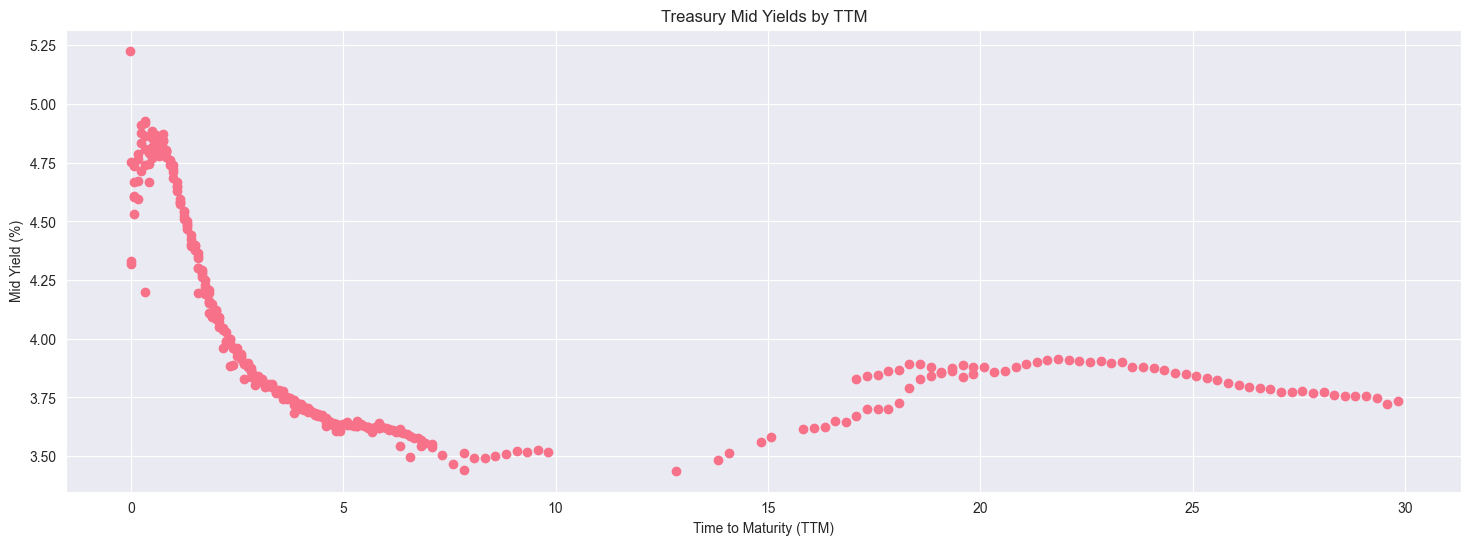

In [68]:
plt.figure(figsize=(18, 6))
plt.scatter(treasury_market_data['TTM'], treasury_market_data['mid_yield'])
plt.xlabel('Time to Maturity (TTM)')
plt.ylabel('Mid Yield (%)')
plt.title('Treasury Mid Yields by TTM')
plt.show()

## b. Explore on-the-run treasuries only
Create a separate joint dataframe for on-the-run treasuries only.

Plot a graph/scatter plot of on-the-run treasury mid yields by TTM.

In [69]:
on_the_run_treasuries = df_symbology.merge(treasury_market_data, on=['figi', 'isin'])

on_the_run_treasuries['TTM'] = on_the_run_treasuries.apply(lambda row: day_count.yearFraction(
    ql_today,
    Date(row['maturity'].day, row['maturity'].month, row['maturity'].year)
), axis=1)

on_the_run_treasuries

,ticker_x,date_x,isin,figi,date_y,class,ticker_y,bid,ask,mid_clean,...,days_settle,cpn_first,acc_first,maturity,country,currency,term,TTM,mid,mid_yield
0,GT10 Govt,2023-04-14,US91282CGM73,BBG01DVKBC66,2023-04-14,Govt,T,99.8438,99.8906,99.8672,...,1,2023-08-15,2023-02-15,2033-02-15,US,USD,10.0,9.833333,99.86720,3.5160
1,GT2 Govt,2023-04-14,US91282CGU99,BBG01G14BXX2,2023-04-14,Govt,T,99.5703,99.5820,99.5762,...,1,2023-09-30,2023-03-31,2025-03-31,US,USD,2.0,1.916667,99.57615,4.1020
2,GT20 Govt,2023-04-14,US912810TQ13,BBG01F6N6GN1,2023-04-14,Govt,T,100.2969,100.3750,100.3359,...,1,2023-08-15,2023-02-15,2043-02-15,US,USD,20.0,19.833333,100.33595,3.8500
3,GT3 Govt,2023-04-14,US91282CGV72,BBG01G5ZMM43,2023-04-14,Govt,T,99.7578,99.7734,99.7656,...,1,2023-10-15,2023-04-15,2026-04-15,US,USD,3.0,3.000000,99.76560,3.8335
4,GT30 Govt,2023-04-14,US912810TN81,BBG01DVKBH56,2023-04-14,Govt,T,97.9531,98.0313,97.9922,...,1,2023-08-15,2023-02-15,2053-02-15,US,USD,30.0,29.833333,97.99220,3.7370
5,GT5 Govt,2023-04-14,US91282CGT27,BBG01G14BW91,2023-04-14,Govt,T,100.0703,100.0859,100.0781,...,1,2023-09-30,2023-03-31,2028-03-31,US,USD,5.0,4.916667,100.07810,3.6075
6,GT7 Govt,2023-04-14,US91282CGS44,BBG01G14BV75,2023-04-14,Govt,T,100.3750,100.4375,100.4063,...,1,2023-09-30,2023-03-31,2030-03-31,US,USD,7.0,6.916667,100.40625,3.5580


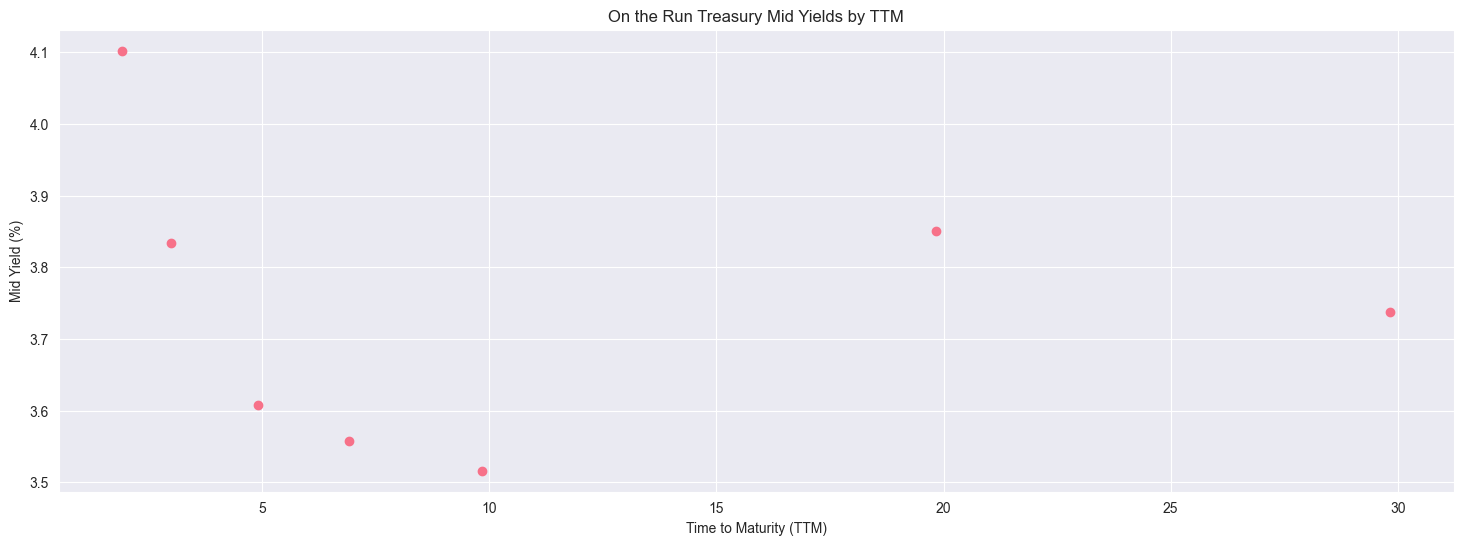

In [70]:
plt.figure(figsize=(18, 6))
plt.scatter(on_the_run_treasuries['TTM'], on_the_run_treasuries['mid_yield'])
plt.xlabel('Time to Maturity (TTM)')
plt.ylabel('Mid Yield (%)')
plt.title('On the Run Treasury Mid Yields by TTM')
plt.show()

## c. Load and explore corporate bond market prices and yields

Join the filtered corporate bonds symbology dataframe with the market data, to add the following columns:


| date | bid | ask | mid | bid_yield | ask_yield | mid_yield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

List the unique tickers/issuers available in the dataframe.

In [71]:
corp_symbology_market_prices = corp_symbology_filtered.merge(market_prices_eod, on=['ticker',  'figi'])
corp_symbology_market_prices['mid'] = (corp_symbology_market_prices['bid'] + corp_symbology_market_prices['ask']) / 2
corp_symbology_market_prices['mid_yield'] = (corp_symbology_market_prices['bid_yield'] + corp_symbology_market_prices['ask_yield']) / 2
corp_symbology_market_prices.head()

,ticker,figi,security,name,coupon,start_date,maturity,term,TTM,date,class,isin,bid,ask,mid_clean,mid_dirty,bid_yield,ask_yield,mid,mid_yield
0,DIS,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.55,2019-11-22,2033-03-15,13.333333,9.916667,2023-04-14,Corp,US254687DV52,115.163,115.984,115.574,116.174,4.624,4.529,115.5735,4.5765
1,DIS,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.20,2019-11-22,2034-12-15,15.083333,11.666667,2023-04-14,Corp,US254687DZ66,112.939,113.586,113.262,115.380,4.742,4.674,113.2625,4.7080
2,DIS,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.40,2019-11-22,2035-12-15,16.083333,12.666667,2023-04-14,Corp,US254687EB89,114.645,115.438,115.042,117.229,4.838,4.761,115.0415,4.7995
3,DIS,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.15,2019-11-22,2037-03-01,17.250000,13.833333,2023-04-14,Corp,US254687EF93,111.153,112.380,111.767,112.570,5.023,4.908,111.7665,4.9655
4,DIS,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.65,2019-11-22,2037-11-15,18.000000,14.583333,2023-04-14,Corp,US254687EH59,118.135,119.168,118.652,121.478,4.895,4.805,118.6515,4.8500


In [72]:
corp_symbology_market_prices['ticker'].unique()

array(['DIS', 'IBM', 'MS', 'ORCL', 'VZ'], dtype=object)

## d. Yield curve plots

Plot a graph/scatter plot of mid yield curves by TTM (one line per ticker/issuer).

Add a separate line for on-the-run US treasury yield curve (risk free curve).

What can you say about the credit issuer yields, compared to US treasury yields?

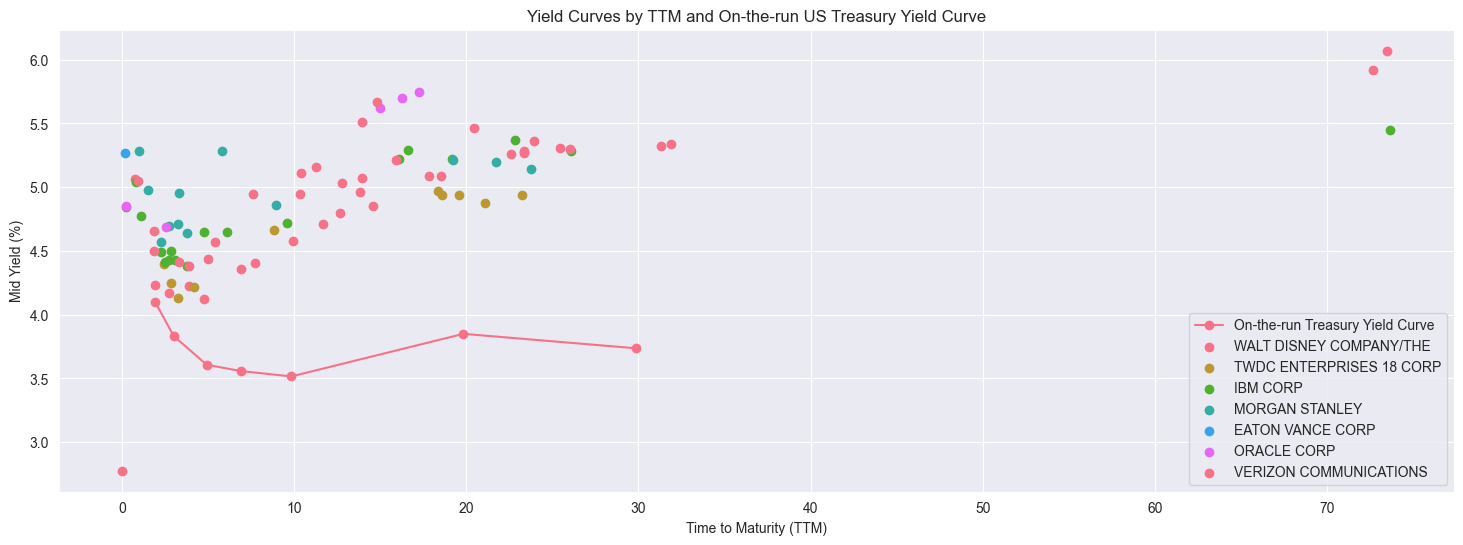

In [73]:
plt.figure(figsize=(18, 6))

on_the_run_treasuries =  on_the_run_treasuries.sort_values('TTM')

plt.plot(on_the_run_treasuries['TTM'], on_the_run_treasuries['mid_yield'], marker='o', label='On-the-run Treasury Yield Curve')

issuers = corp_symbology_market_prices['name'].unique()
for issuer in issuers:
    issuer_data = corp_symbology_market_prices[corp_symbology_market_prices['name'] == issuer]
    plt.scatter(issuer_data['TTM'], issuer_data['mid_yield'], marker='o', label=f'{issuer}')

plt.xlabel('Time to Maturity (TTM)')
plt.ylabel('Mid Yield (%)')
plt.title('Yield Curves by TTM and On-the-run US Treasury Yield Curve')
plt.legend()
plt.show()

# Problem 3: Underying treasury benchmarks and credit spreads

## a. Add underlying benchmark bond mid yields

Use the column 'und_bench_yield' to identify the underlying benchmark bond for each issue.

Add two new columns to the joint corporate bond dataframe:

| und_bench_yield | credit_spread |
|----------|-------|

where 

*  `und_bench_yield` = underlying benchmark bond mid yield and
*  `credit_spread` = issue yield - underlying benchmark bond mid yield.

In [74]:
on_the_run_treasuries['maturity'] = pd.to_datetime(on_the_run_treasuries['maturity'])
corp_symbology_market_prices['maturity'] = pd.to_datetime(corp_symbology_market_prices['maturity'])

def closest(row, on_the_run_treasuries):
    closest_date_index = (on_the_run_treasuries['maturity'] - row['maturity']).abs().idxmin()
    closest_date_row = on_the_run_treasuries.loc[closest_date_index]
    return closest_date_row['ticker_x'], closest_date_row['mid_yield']

und_ticker, und_bench_yield = zip(*[closest(row, on_the_run_treasuries) for _, row in corp_symbology_market_prices.iterrows()])

corp_symbology_market_prices = corp_symbology_market_prices.assign(
    underlying_ticker=und_ticker,
    und_bench_yield=und_bench_yield,
    credit_spread=lambda df: df['mid_yield'] - df['und_bench_yield']
)

corp_symbology_market_prices.head()


,ticker,figi,security,name,coupon,start_date,maturity,term,TTM,date,...,ask,mid_clean,mid_dirty,bid_yield,ask_yield,mid,mid_yield,underlying_ticker,und_bench_yield,credit_spread
0,DIS,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.55,2019-11-22,2033-03-15,13.333333,9.916667,2023-04-14,...,115.984,115.574,116.174,4.624,4.529,115.5735,4.5765,GT10 Govt,3.516,1.0605
1,DIS,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.20,2019-11-22,2034-12-15,15.083333,11.666667,2023-04-14,...,113.586,113.262,115.380,4.742,4.674,113.2625,4.7080,GT10 Govt,3.516,1.1920
2,DIS,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.40,2019-11-22,2035-12-15,16.083333,12.666667,2023-04-14,...,115.438,115.042,117.229,4.838,4.761,115.0415,4.7995,GT10 Govt,3.516,1.2835
3,DIS,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.15,2019-11-22,2037-03-01,17.250000,13.833333,2023-04-14,...,112.380,111.767,112.570,5.023,4.908,111.7665,4.9655,GT10 Govt,3.516,1.4495
4,DIS,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.65,2019-11-22,2037-11-15,18.000000,14.583333,2023-04-14,...,119.168,118.652,121.478,4.895,4.805,118.6515,4.8500,GT10 Govt,3.516,1.3340


## b. Credit spread curve plots

Plot a graph/scatter plot of credit spread curves by TTM (one line per issuer).


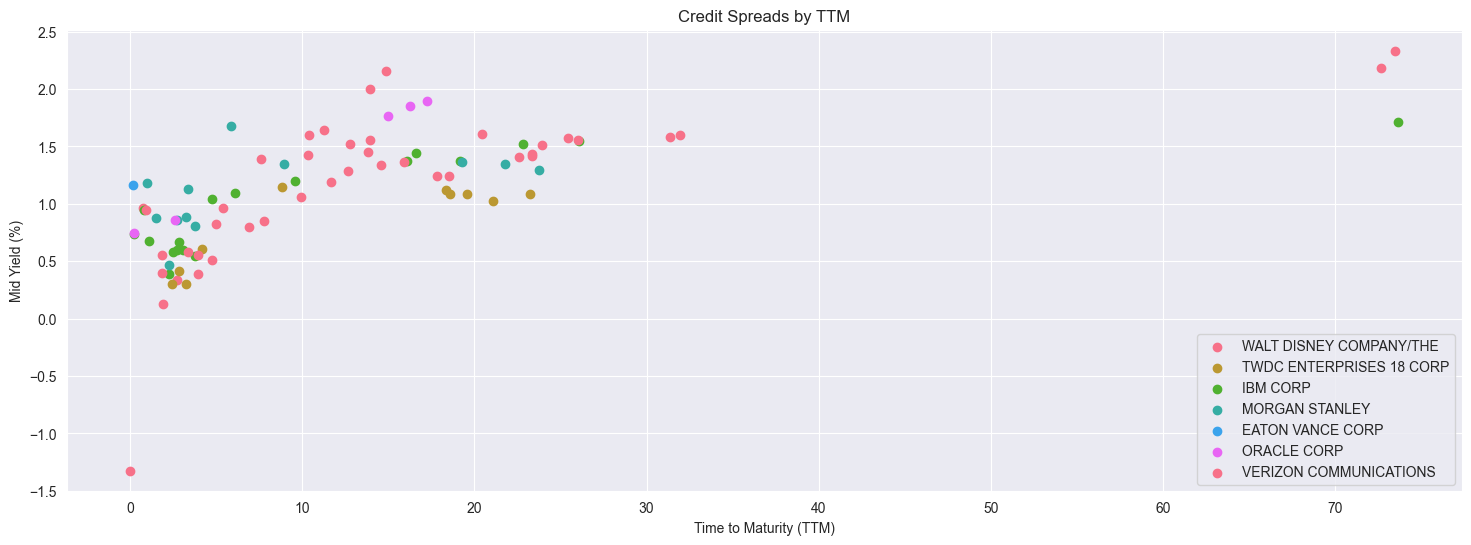

In [81]:
plt.figure(figsize=(18, 6))

issuers = corp_symbology_market_prices['name'].unique()
for issuer in issuers:
    issuer_data = corp_symbology_market_prices[corp_symbology_market_prices['name'] == issuer]
    plt.scatter(issuer_data['TTM'], issuer_data['credit_spread'], marker='o', label=f'{issuer}')

plt.xlabel('Time to Maturity (TTM)')
plt.ylabel('Mid Yield (%)')
plt.title('Credit Spreads by TTM')
plt.legend()
plt.show()

## c. Add g-spreads

Add two new columns to the joint corporate bond dataframe:

| interp_tsy_yield | g_spread |
|----------|-------|

where 

*  `interp_tsy_yield` = interpolated treasury yield (using on-the-run treasuries only), matching the issue maturity
*  `g_spread` = issue yield - interp_tsy_yield.

In [76]:
sorted_treasuries = on_the_run_treasuries.sort_values(by='maturity')
sorted_treasuries['maturity_days'] = (sorted_treasuries['maturity'] - sorted_treasuries['maturity'].min()).apply(lambda x: x.days)

corp_symbology_market_prices['interp_tsy_yield'] = corp_symbology_market_prices.apply(
    lambda row: np.interp(
        (row['maturity'] - sorted_treasuries['maturity'].min()).days,
        sorted_treasuries['maturity_days'],
        sorted_treasuries['mid_yield']
    ),
    axis=1
)

corp_symbology_market_prices['g_spread'] = corp_symbology_market_prices['mid_yield'] - corp_symbology_market_prices['interp_tsy_yield']

corp_symbology_market_prices.head()

,ticker,figi,security,name,coupon,start_date,maturity,term,TTM,date,...,mid_dirty,bid_yield,ask_yield,mid,mid_yield,underlying_ticker,und_bench_yield,credit_spread,interp_tsy_yield,g_spread
0,DIS,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.55,2019-11-22,2033-03-15,13.333333,9.916667,2023-04-14,...,116.174,4.624,4.529,115.5735,4.5765,GT10 Govt,3.516,1.0605,3.518561,1.057939
1,DIS,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.20,2019-11-22,2034-12-15,15.083333,11.666667,2023-04-14,...,115.380,4.742,4.674,113.2625,4.7080,GT10 Govt,3.516,1.1920,3.577093,1.130907
2,DIS,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.40,2019-11-22,2035-12-15,16.083333,12.666667,2023-04-14,...,117.229,4.838,4.761,115.0415,4.7995,GT10 Govt,3.516,1.2835,3.610475,1.189025
3,DIS,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.15,2019-11-22,2037-03-01,17.250000,13.833333,2023-04-14,...,112.570,5.023,4.908,111.7665,4.9655,GT10 Govt,3.516,1.4495,3.650899,1.314601
4,DIS,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.65,2019-11-22,2037-11-15,18.000000,14.583333,2023-04-14,...,121.478,4.895,4.805,118.6515,4.8500,GT10 Govt,3.516,1.3340,3.674586,1.175414


## d. G-spread curve plots

Plot a graph/scatter plot of g-spread curves by TTM (one line per issuer).


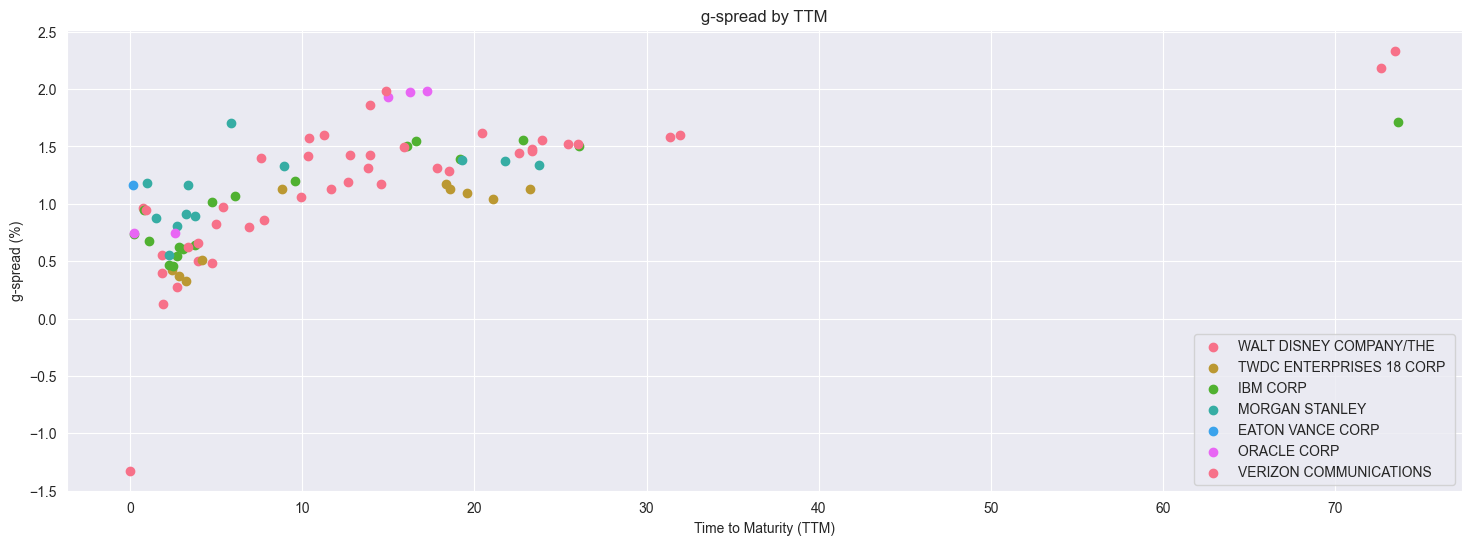

In [79]:
plt.figure(figsize=(18, 6))

issuers = corp_symbology_market_prices['name'].unique()
for issuer in issuers:
    issuer_data = corp_symbology_market_prices[corp_symbology_market_prices['name'] == issuer]
    plt.scatter(issuer_data['TTM'], issuer_data['g_spread'], marker='o', label=f'{issuer} ')

plt.xlabel('Time to Maturity (TTM)')
plt.ylabel('g-spread (%)')
plt.title('g-spread by TTM')
plt.legend()
plt.show()

# Problem 4: Explore the QuantLib introductory notebook

Try to link concepts discussed in Session 1 to various sections in the notebook. 

Address open questions by consulting the library documentation.

Going forward, we will be using QuantLib for curve calibration (US Treasury + SOFR), as well as pricing and risk of various cash and synthetic credit instruments.

### Discussion: 
In Session 1, we discussed how yield curves are used to estimate the term structure of interest rates, and how credit spreads are added to the yield curve to price corporate bonds and how to calculate bond prices and yields, and how to measure bond risks such as duration and convexity. 

The notebook along with different files and datasets provide us different aspects of the credit markets, including yield curves, bond pricing and risk, credit spreads, and g-spreads. We also get to practice how to calculate bond prices and yields, and how to measure bond risks such as duration and convexity and to construct yield curves using different methods, such as bootstrapping and interpolation.